# EDA on the US crashes

## Importing libraries and input file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_raw = pd.read_csv(r"B:\My projects\US accidents EDA\US_Accidents_Dec21_updated.csv")

## Data preparation and cleaning

In [2]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

## More information on the dataset 

In [3]:
data_raw.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [4]:
numerics = ['int16', 'int32', 'int64', 'float32', 'float64']
numerics_data = data_raw.select_dtypes(include = numerics)
len(numerics_data.columns)

14

## Checking missing or null values

In [5]:
missvalue_percent = 100*(data_raw.isnull().sum()/len(data_raw))
missvalue_percent = missvalue_percent[missvalue_percent>0]
missvalue_percent = missvalue_percent.sort_values(ascending = False)


C:\Users\lokes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, '% of nulls')

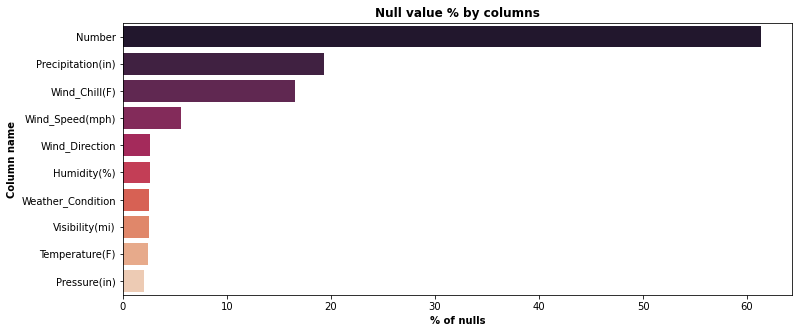

In [6]:
plt.figure(figsize=(12,5))
sns.barplot(missvalue_percent[missvalue_percent>2].values, missvalue_percent[missvalue_percent>2].index, palette = 'rocket')
plt.title("Null value % by columns", fontweight='bold')
plt.ylabel("Column name", fontweight='bold')
plt.xlabel("% of nulls", fontweight='bold')

Since "Number" column has around 60% nulls its not possible for us to gain any insights from it.

## Exploring the dataset more

In [7]:
data = data_raw.drop('Number', axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Street                 object 
 11  Side                   object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

## Crashes plotted based on severity

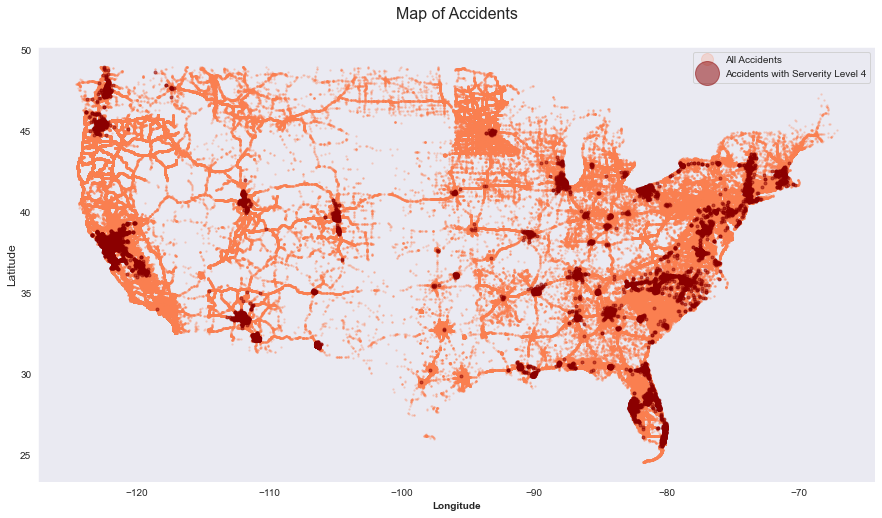

In [8]:
severity = data[data['Severity']==1]
plt.figure(figsize=(15,8))
sns.set_style('dark')
plt.plot( 'Start_Lng', 'Start_Lat', data=data, linestyle='', marker='o', markersize=1.5, color='coral', alpha=0.2, label='All Accidents')
plt.plot( 'Start_Lng', 'Start_Lat', data=severity, linestyle='', marker='o', markersize=3, color="darkred", alpha=0.5, label='Accidents with Serverity Level 4')
plt.legend(markerscale=8)
plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', size=12, labelpad=3)
plt.title('Map of Accidents', size=16, y=1.05)
plt.show()

## Top10 cities with crashes

Text(0.5, 1.0, 'Top 10 cities with most crashes')

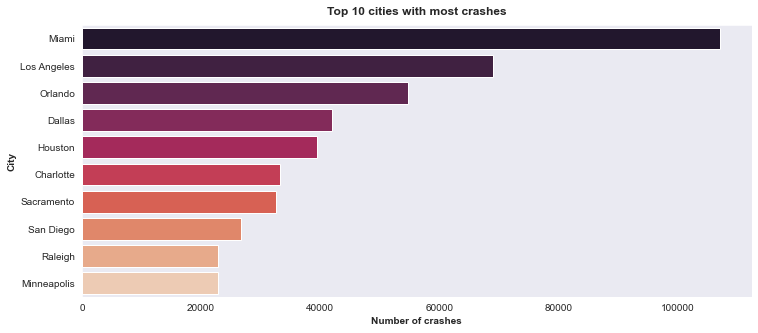

In [9]:
cities = data['City']
top10cities = cities.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
ax = sns.barplot(y=top10cities.index, x=top10cities.values, palette = 'rocket')
plt.xlabel('Number of crashes', fontweight='bold')
plt.ylabel('City', fontweight='bold')
plt.title('Top 10 cities with most crashes', fontweight='bold', pad =10.0)

In [10]:
city_count = data_raw['City'].value_counts()
city_min_acc = city_count[city_count < 5000]
city_min_acc.tail()

Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, dtype: int64

C:\Users\lokes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'US cities where accident cases recorded are less than 5000')

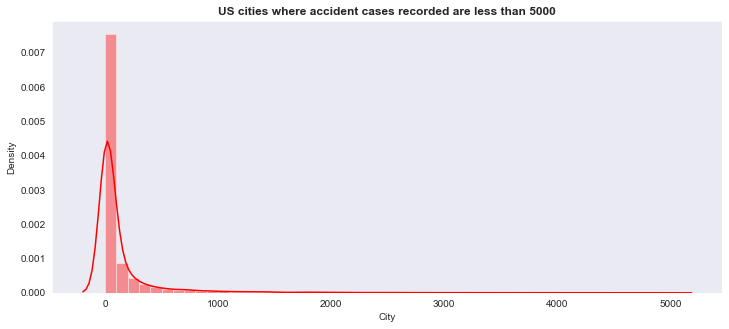

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(city_min_acc, color = 'red')
plt.title("US cities where accident cases recorded are less than 5000",fontweight = 'bold')

## Top10 states with crashesh

Text(0.5, 1.0, 'Top 10 states with most crashes')

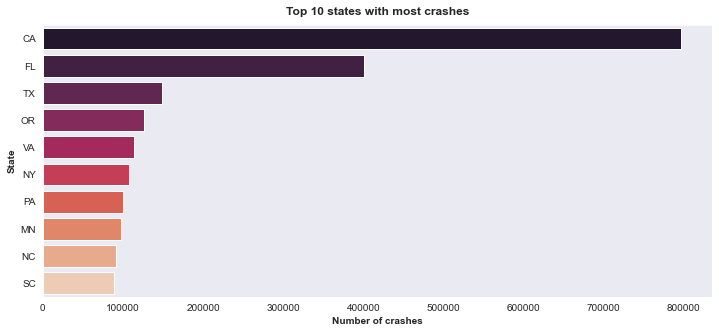

In [12]:
states = data['State']
top10states = states.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
ax = sns.barplot(y=top10states.index, x=top10states.values, palette = 'rocket')
plt.xlabel('Number of crashes', fontweight='bold')
plt.ylabel('State', fontweight='bold')
plt.title('Top 10 states with most crashes', fontweight='bold', pad =10.0)

## Crashes across different timezone in the US

US/Eastern     1221927
US/Pacific      967094
US/Central      488065
US/Mountain     164597
Name: Timezone, dtype: int64


Text(0, 0.5, 'Timezone')

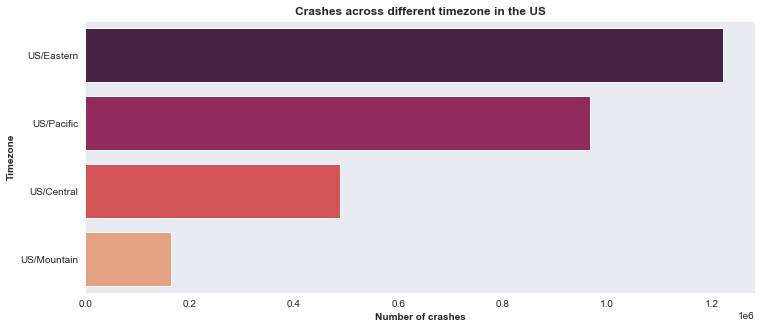

In [13]:
timezone_max_acc = data['Timezone'].value_counts()
print(timezone_max_acc)
plt.figure(figsize=(12,5))
sns.barplot(y = timezone_max_acc.index, x = timezone_max_acc.values, palette = 'rocket')
plt.title("Crashes across different timezone in the US", fontweight = 'bold')
plt.xlabel('Number of crashes', fontweight = 'bold')
plt.ylabel('Timezone', fontweight = 'bold')

## Top 10 accident prone roads in the US

I-95 N     39853
I-5 N      39402
I-95 S     36425
I-5 S      30229
I-10 E     26164
I-10 W     25298
I-80 W     17545
I-80 E     16873
I-405 N    13708
I-15 N     12675
Name: Street, dtype: int64


Text(0.5, 0, 'Number of crashes')

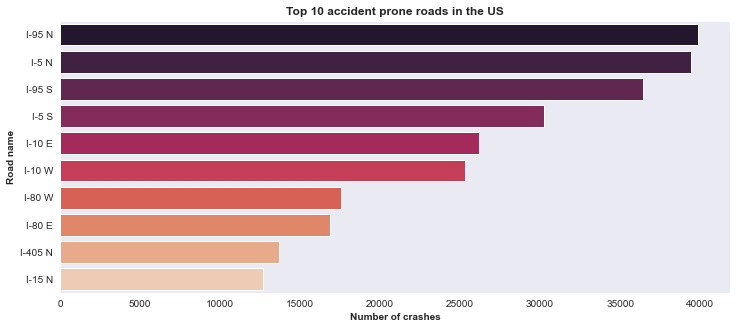

In [14]:
street_acc_count = data['Street'].value_counts()
street_max_acc = street_acc_count.head(10)
print(street_max_acc)
plt.figure(figsize=(12,5))
sns.barplot(y = street_max_acc.index, x = street_max_acc, palette = 'rocket')
plt.title("Top 10 accident prone roads in the US", fontweight = 'bold')
plt.ylabel('Road name', fontweight = 'bold')
plt.xlabel('Number of crashes', fontweight = 'bold')

## Crash trends in different hours in the US

17    220358
16    218385
15    214264
14    191480
18    168982
13    166473
12    143715
7     135191
8     130879
19    116911
11    113271
6     111160
9     108779
10    103926
20     94682
21     87078
22     81188
5      80303
23     74243
0      68800
1      59370
2      55443
4      51805
3      48656
Name: Start_Time, dtype: int64


Text(0, 0.5, 'Number of crashes')

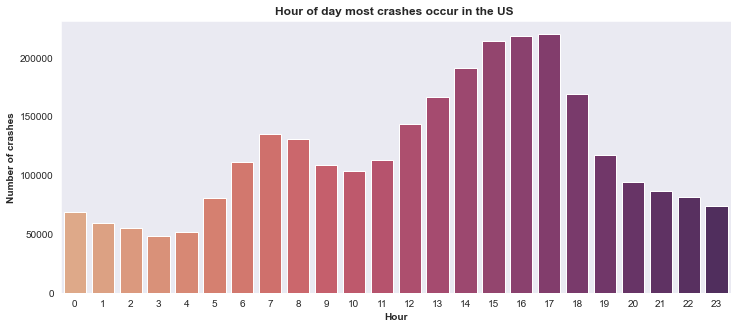

In [15]:
data.Start_Time = pd.to_datetime(data.Start_Time)
data.Start_Time
hour = data.Start_Time.dt.hour.value_counts()
print(hour)
plt.figure(figsize=(12,5))
sns.barplot(y=hour, x=hour.index, palette = 'flare')
plt.title("Hour of day most crashes occur in the US ", fontweight = 'bold')
plt.xlabel('Hour', fontweight = 'bold')
plt.ylabel('Number of crashes', fontweight = 'bold')

## Crashes for different weekdays in the US

Friday       492074
Thursday     463477
Wednesday    455037
Tuesday      443968
Monday       419821
Saturday     311691
Sunday       259274
Name: Start_Time, dtype: int64


Text(0, 0.5, 'Number of accidents')

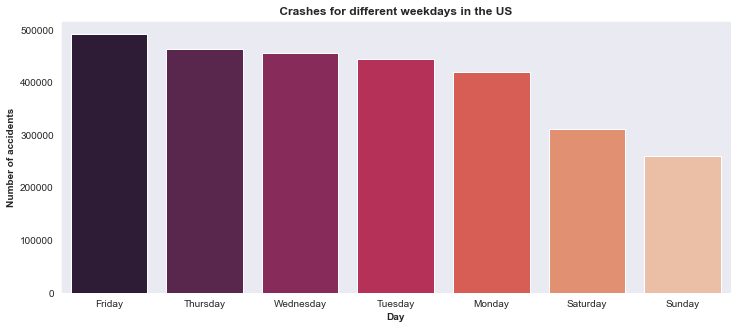

In [16]:
weekday_max = data.Start_Time.dt.day_name().value_counts()
print(weekday_max)
plt.figure(figsize=(12 ,5))
sns.barplot(y=weekday_max, x=weekday_max.index, palette = 'rocket')
plt.title(" Crashes for different weekdays in the US ",fontweight ="bold")
plt.xlabel('Day', fontweight ="bold")
plt.ylabel('Number of accidents', fontweight ="bold")

## Crashes across different months in the US

December     473943
November     360696
October      299131
September    241822
June         226561
January      198365
February     194995
May          181944
August       178670
April        171880
July         159111
March        158224
Name: Start_Time, dtype: int64


Text(0, 0.5, 'Month')

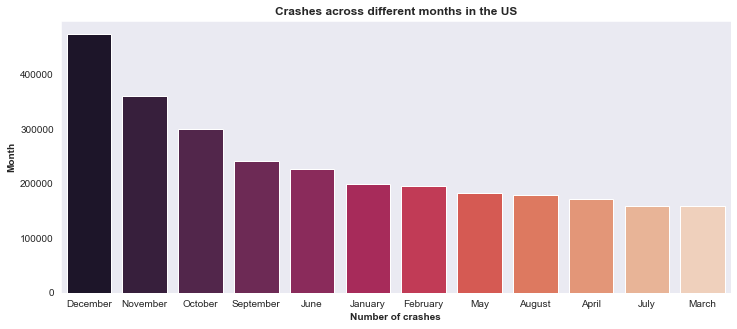

In [17]:
month_max = data.Start_Time.dt.month_name().value_counts()
print(month_max)
plt.figure(figsize=(12,5))
sns.barplot(y=month_max, x=month_max.index, palette = 'rocket')
plt.title("Crashes across different months in the US", fontweight ="bold")
plt.xlabel("Number of crashes", fontweight ="bold")
plt.ylabel("Month", fontweight ="bold")

## Crash trends in the US

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64


Text(0, 0.5, 'Number of crashes')

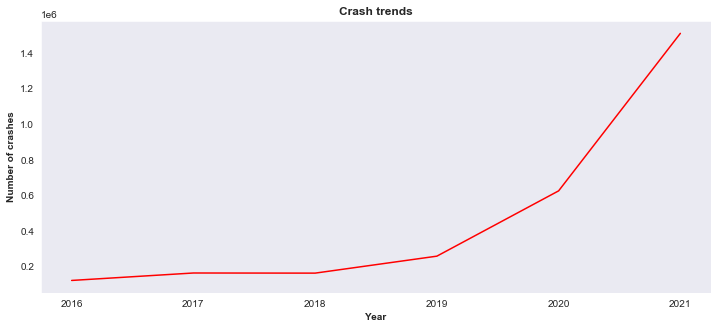

In [18]:
year_max = data.Start_Time.dt.year.value_counts()
print(year_max)
plt.figure(figsize=(12,5))
sns.lineplot(data =year_max, color = "red")
plt.title("Crash trends", fontweight ="bold")
plt.xlabel('Year', fontweight ="bold")
plt.ylabel('Number of crashes', fontweight ="bold")

## Crashes in different temperatures

59.0    56025
66.0    56336
70.0    57760
64.0    57937
63.0    58259
68.0    58557
72.0    59681
75.0    60534
77.0    63575
73.0    64505
Name: Temperature(F), dtype: int64


Text(0.5, 1.0, 'Crashes in different temperature')

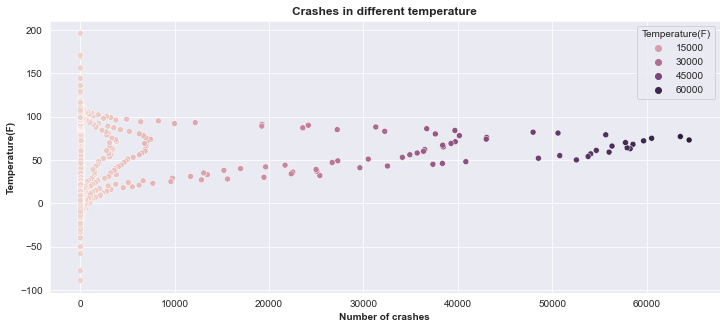

In [19]:
weather = data['Temperature(F)'].value_counts()
print(weather.sort_values().tail(10))
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.scatterplot(y=weather.index, x=weather, hue=weather)
plt.ylabel('Temperature(F)', fontweight ="bold")
plt.xlabel('Number of crashes', fontweight="bold")
plt.title('Crashes in different temperature', fontweight="bold")

## Crashes in different humidities

96.0      45111
67.0      45180
81.0      45330
82.0      46793
86.0      47702
89.0      53396
90.0      57587
87.0      60236
100.0     96907
93.0     103607
Name: Humidity(%), dtype: int64


Text(0.5, 1.0, 'Crashes in different humidities')

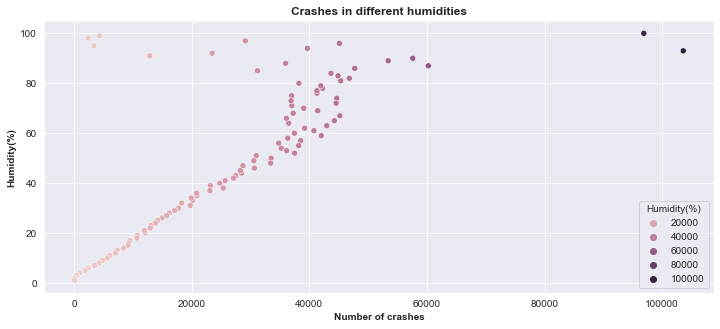

In [20]:
humidity = data['Humidity(%)'].value_counts()
print(humidity.sort_values().tail(10))
sns.set_style("darkgrid")
plt.figure(figsize=(12,5))
sns.scatterplot(y=humidity.index, x=humidity, hue=humidity)
plt.ylabel('Humidity(%)', fontweight ="bold")
plt.xlabel('Number of crashes', fontweight="bold")
plt.title('Crashes in different humidities', fontweight="bold")

## Crashes in different wind speeds

0.0     433636
5.0     231000
3.0     225664
6.0     222502
7.0     205667
8.0     184037
9.0     165127
10.0    135850
12.0    117003
13.0     88872
Name: Wind_Speed(mph), dtype: int64


Text(0.5, 1.0, 'Crashes in different wind speeds')

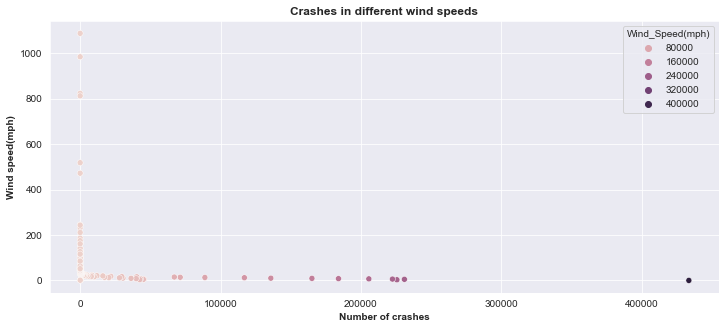

In [21]:
windspeed = data['Wind_Speed(mph)'].value_counts()
print(windspeed.sort_values(ascending=False).head(10))
sns.set_style('darkgrid')
plt.figure(figsize=(12,5))
sns.scatterplot(y=windspeed.index, x=windspeed, hue=windspeed)
plt.ylabel('Wind speed(mph)', fontweight ="bold")
plt.xlabel('Number of crashes', fontweight="bold")
plt.title('Crashes in different wind speeds', fontweight="bold")

## Crashes in different environmental pressures

29.96    43668
29.94    43165
29.99    42978
30.01    41736
30.03    41477
30.04    40651
29.97    40395
30.00    40178
29.95    40084
29.93    39474
Name: Pressure(in), dtype: int64


Text(0.5, 1.0, 'Crashes in different environmental pressures')

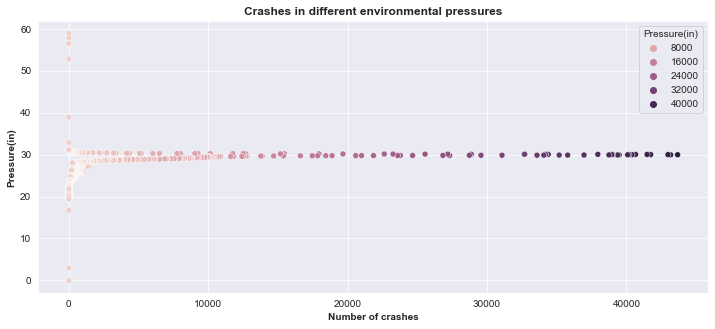

In [22]:
pressure = data['Pressure(in)'].value_counts()
print(pressure.sort_values(ascending=False).head(10))
plt.figure(figsize=(12,5))
sns.scatterplot(y=pressure.index, x=pressure, hue=pressure)
plt.ylabel('Pressure(in)', fontweight ="bold")
plt.xlabel('Number of crashes', fontweight="bold")
plt.title('Crashes in different environmental pressures', fontweight="bold")

## Crashes in different weather conditions

Fair                1107194
Mostly Cloudy        363959
Cloudy               348767
Partly Cloudy        249939
Clear                173823
Light Rain           128403
Overcast              84882
Scattered Clouds      45132
Light Snow            43752
Fog                   41226
Name: Weather_Condition, dtype: int64


Text(0.5, 1.0, 'Crashes in different weather conditions')

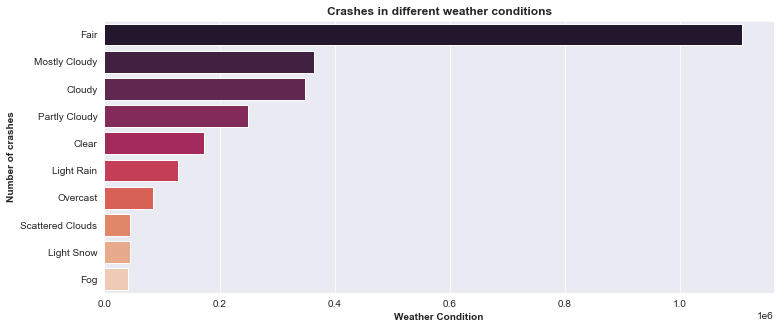

In [23]:
weather = data['Weather_Condition'].value_counts()
weather = weather.sort_values(ascending=False).head(10)
print(weather)
plt.figure(figsize=(12,5))
sns.barplot(x=weather, y=weather.index, palette='rocket')
plt.xlabel('Weather Condition', fontweight ="bold")
plt.ylabel('Number of crashes', fontweight="bold")
plt.title('Crashes in different weather conditions', fontweight="bold")